<a href="https://colab.research.google.com/github/Heriyan-LA/HeryProject/blob/main/Proyek_Analisis_Data_Heriyanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Heriyanto
- **Email:** h3ryan2.hery@gmail.com
- **ID Dicoding:** I000ywI064

## Menentukan Pertanyaan Bisnis

**bold text**
- Pertanyaan 1. Kapan penggunaan sepeda paling banyak dan sedikit?
- Pertanyaan 2. Siapakah penggunaan sepeda paling sering saat hari kerja dan hari libur?

In [1]:
pip install squarify

## Import Semua Packages/Library yang Digunakan

In [2]:
import squarify
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime

## Data Wrangling

### Gathering Data

In [3]:
# Load data day.csv
tbl_hari = pd.read_csv('/content/day.csv')


In [4]:
tbl_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Menghitung jumlah baris yg berhasil diupload:
jumlah_baris = tbl_hari.shape[0]

print("Jumlah baris:", jumlah_baris)

Jumlah baris: 731


In [7]:
# Load data hour.csv
tbl_jam = pd.read_csv('/content/hour.csv')



In [8]:
# Menghitung jumlah baris yg berhasil diupload:
jumlah_baris = tbl_jam.shape[0]

print("Jumlah baris:", jumlah_baris)

Jumlah baris: 17379


In [9]:
tbl_jam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berdasarkan dataset day kita bisa menggunakan fields cnt, season, workingday untuk mengetahui dimana penggunaan sepeda paling ramai atau sepi
- Berdasarkan dataset hour kita bisa membreakdown penggunaan sepeda terbanyak apakah di jam kerja atau saat liburan

### Assessing Data

In [10]:
tbl_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
tbl_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Untuk mengetahui breakdown data di jam kerja atau tidak bisa menggunakan dteday sebagai primary key-nya
- Jika akan mencari tahu apakah banyak pengguna yang menggunakan system ini pengguna yang terdaftar atau tidak akan digunakan perbandingan field casual dan registered

### Cleaning Data

Cek duplikasi data di dua datashet

In [12]:
#Cek apakah ada duplikasi datashet hari
duplikat = tbl_hari.duplicated()
jumlah_duplikat = duplikat.sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


In [13]:
#Cek apakah ada duplikasi datashet jam
duplikat = tbl_jam.duplicated()
jumlah_duplikat = duplikat.sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


In [16]:
# Cek null per kolom tbl_hari
null_per_kolom = tbl_hari.isnull().sum()
print(null_per_kolom)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [17]:
# Cek null per kolom tbl_jam
null_per_kolom = tbl_jam.isnull().sum()
print(null_per_kolom)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Karena data tidak terdapat duplikasi diharapkan informasi akan lebih valid
- Data tidak berisi fields yg null

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
# Menggabungkan datashet baru yang berisi data groupning
# Group by season dan workingday, lalu sum kolom casual, registered, dan cnt
df_baru = tbl_hari.groupby(['dteday','season', 'workingday'])[['casual', 'registered', 'cnt']].sum().reset_index()

# Tampilkan hasil
print(df_baru)

         dteday  season  workingday  casual  registered   cnt
0    2011-01-01       1           0     331         654   985
1    2011-01-02       1           0     131         670   801
2    2011-01-03       1           1     120        1229  1349
3    2011-01-04       1           1     108        1454  1562
4    2011-01-05       1           1      82        1518  1600
..          ...     ...         ...     ...         ...   ...
726  2012-12-27       1           1     247        1867  2114
727  2012-12-28       1           1     644        2451  3095
728  2012-12-29       1           0     159        1182  1341
729  2012-12-30       1           0     364        1432  1796
730  2012-12-31       1           1     439        2290  2729

[731 rows x 6 columns]


In [19]:
# Hari dengan jumlah cnt terbanyak
hari_max = df_baru.loc[df_baru['cnt'].idxmax()]

# Hari dengan jumlah cnt tersedikit
hari_min = df_baru.loc[df_baru['cnt'].idxmin()]

# Tampilkan hasil
print("🔺 Hari dengan jumlah sepeda terbanyak:")
print(hari_max)

print("\n🔻 Hari dengan jumlah sepeda tersedikit:")
print(hari_min)

🔺 Hari dengan jumlah sepeda terbanyak:
dteday        2012-09-15
season                 3
workingday             0
casual              3160
registered          5554
cnt                 8714
Name: 623, dtype: object

🔻 Hari dengan jumlah sepeda tersedikit:
dteday        2012-10-29
season                 4
workingday             1
casual                 2
registered            20
cnt                   22
Name: 667, dtype: object


In [20]:
# Mencari tahu apakah pengguna casual atau registered yang sering
# menggunakan sepeda saat hari kerja dan hari libur
# Filter data saat workingday = 0
libur_df = tbl_hari[tbl_hari['workingday'] == 0]

# Hitung total casual dan registered
total_casual = libur_df['casual'].sum()
total_registered = libur_df['registered'].sum()

# Tampilkan hasil
print("📊 Total penggunaan sepeda saat hari libur (workingday=0):")
print(f"👥 Casual     : {total_casual}")
print(f"👤 Registered : {total_registered}")

# Analisis siapa yang lebih sering
if total_casual > total_registered:
    print("\n✅ Pengguna **Casual** lebih banyak menggunakan sepeda saat hari libur.")
else:
    print("\n✅ Pengguna **Registered** lebih banyak menggunakan sepeda saat hari libur.")





📊 Total penggunaan sepeda saat hari libur (workingday=0):
👥 Casual     : 316732
👤 Registered : 683537

✅ Pengguna **Registered** lebih banyak menggunakan sepeda saat hari libur.


In [21]:
# Mencari tahu apakah pengguna casual atau registered yang sering
# menggunakan sepeda saat hari kerja dan hari libur
# Filter data untuk workingday = 1 (hari kerja)
kerja_df = tbl_hari[tbl_hari['workingday'] == 1]

# Hitung total casual dan registered
total_casual = kerja_df['casual'].sum()
total_registered = kerja_df['registered'].sum()

# Tampilkan hasil
print("📊 Total penggunaan sepeda saat hari kerja (workingday=1):")
print(f"👥 Casual     : {total_casual}")
print(f"👤 Registered : {total_registered}")

# Analisis siapa yang lebih sering
if total_casual > total_registered:
    print("\n✅ Pengguna **Casual** lebih banyak menggunakan sepeda saat hari kerja.")
else:
    print("\n✅ Pengguna **Registered** lebih banyak menggunakan sepeda saat hari kerja.")


📊 Total penggunaan sepeda saat hari kerja (workingday=1):
👥 Casual     : 303285
👤 Registered : 1989125

✅ Pengguna **Registered** lebih banyak menggunakan sepeda saat hari kerja.


**Insight:**
- Pengguna sepeda paling banyak jatuh pada saat hari libur saat season fall dengan pengguna registerd dengan 63,74% dari total pengguna pada hari itu. Sedangkan Pengguna sepeda paling sedikit pada saat hari kerja musim dingin.
- Pengguna Registerd tetap sebagai pengguna terbesar baik saat hari kerja atau saat liburan.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

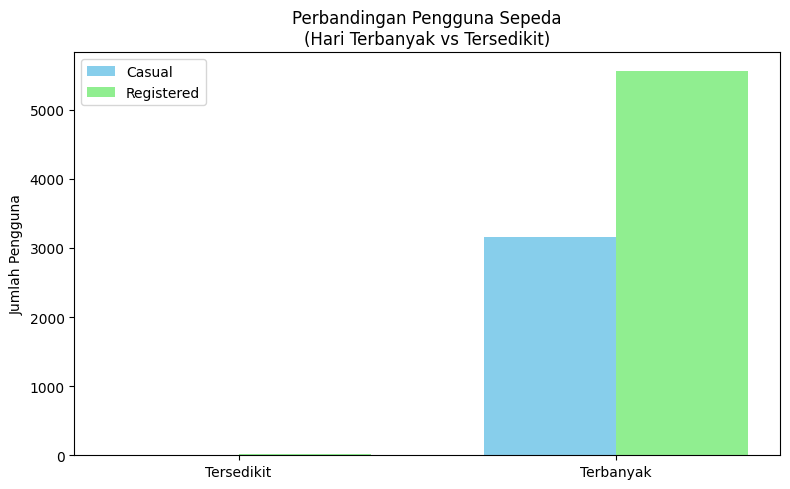

In [22]:
# Ambil data hari dengan cnt terbanyak dan tersedikit
hari_terbanyak = df_baru.loc[df_baru['cnt'].idxmax()]
hari_tersedikit = df_baru.loc[df_baru['cnt'].idxmin()]

# Siapkan data untuk plot
labels = ['Tersedikit', 'Terbanyak']
cnt_values = [hari_tersedikit['cnt'], hari_terbanyak['cnt']]
casual_values = [hari_tersedikit['casual'], hari_terbanyak['casual']]
registered_values = [hari_tersedikit['registered'], hari_terbanyak['registered']]

# Plot
x = range(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x, casual_values, width=width, label='Casual', color='skyblue')
plt.bar([i + width for i in x], registered_values, width=width, label='Registered', color='lightgreen')
plt.xticks([i + width/2 for i in x], labels)
plt.ylabel("Jumlah Pengguna")
plt.title("Perbandingan Pengguna Sepeda\n(Hari Terbanyak vs Tersedikit)")
plt.legend()
plt.tight_layout()
plt.show()


### Pertanyaan 2:

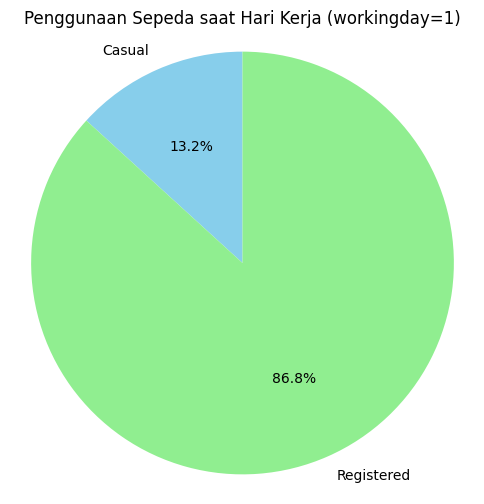

In [23]:
# Filter data untuk hari kerja
kerja_df = tbl_hari[tbl_hari['workingday'] == 1]

# Hitung total
total_casual = kerja_df['casual'].sum()
total_registered = kerja_df['registered'].sum()

# Pie Chart
labels = ['Casual', 'Registered']
values = [total_casual, total_registered]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Penggunaan Sepeda saat Hari Kerja (workingday=1)')
plt.axis('equal')
plt.show()


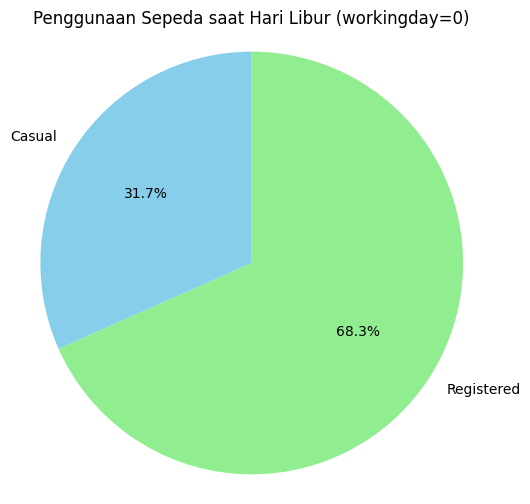

In [24]:
# Filter data untuk hari libur
kerja_df = tbl_hari[tbl_hari['workingday'] == 0]

# Hitung total
total_casual = kerja_df['casual'].sum()
total_registered = kerja_df['registered'].sum()

# Pie Chart
labels = ['Casual', 'Registered']
values = [total_casual, total_registered]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Penggunaan Sepeda saat Hari Libur (workingday=0)')
plt.axis('equal')
plt.show()

In [25]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [26]:
%%writefile bike_app.py

Writing bike_app.py


In [27]:
!pip install pyngrok

**Insight:**
Untuk deploy jangka panjang, akan lebih baik:

- Push project ke GitHub
- Deploy di Streamlit Cloud

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 :
Pengguna sepeda paling banyak jatuh pada saat hari libur saat musim gugur dengan pengguna registerd dengan 63,74% dari total pengguna pada hari itu. Sedangkan Pengguna sepeda paling sedikit pada saat hari kerja musim dingin.

- Conclution pertanyaan 2 : Pengguna Registerd tetap sebagai pengguna terbesar baik saat hari kerja atau saat liburan.